##**Defining the Question.**

###a) Specifying the Question

You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices 

###b) Defining the Metric for Success

Analyze data.
Normalize data as it has different units.
Create models to depict accuracy.

###c) Understanding the context

The data contains one dataset with the prices of houses from 1900 to 2015. It has 20 columns that contain variables that will be used to predict the sales of prices

Task to predict the sale of prices  in the near future.

###d) Recording the Experimental Design
(CRISP- DM) methodology

*   Get the data
*   understand the data

*   Clean the data
*   Explore the data

*   Create models
*   Evaluate model perfomance








##**Data Relevance**

###Loading the Libraries

In [0]:
#import pandas libraries
import pandas as pd
import pandas_profiling as pp
#Import numpy libraries
import numpy as np
import scipy as sp

#import matplot libraries
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn libraries
import seaborn as sns

# Import sklearn linear_model libraries 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error,  r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score 
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [56]:
data = pd.read_csv('house.csv')
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##**Access information about our datasets**

In [26]:
#Check the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


All the variables have the correct datatypes

In [57]:
#Show the shape of the datasets
print(data.shape)


(21613, 20)


In [8]:
#Check missing values
data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values

##**Previewing our final dataset**

This is done through pandas profiling

In [6]:
report = pp.ProfileReport(data)
report

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,20
Number of observations,21613
Total Missing (%),0.0%
Total size in memory,3.3 MiB
Average record size in memory,160.0 B
Numeric,19
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


##**EDA Analysis**

### Checking for anomalies

In [9]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

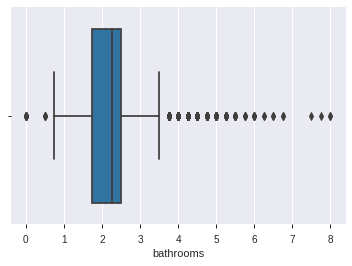

In [27]:
import seaborn as sns
#Use boxplots for bathroom column

sns.boxplot(x=data['bathrooms'])

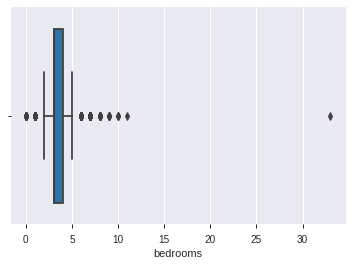

In [28]:
#Use boxplots for bedroom column
sns.boxplot(x=data['bedrooms'])

There is one outlier that points out. To see the characteristics of this house, filter it out

In [58]:
#View the row that has the outlier 
y = data[data["bedrooms"] >= 30]
y

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


The row contains 33 bedrooms, is a grade 7, price is relevant.This may have been an input error so we drop it si that it does not skew our data analysis.  

In [59]:
#drop the row by index
#data.drop(y)
data=data.drop(data.index[15870])

# Confirm the index row has been deleted.
data.shape

(21612, 20)

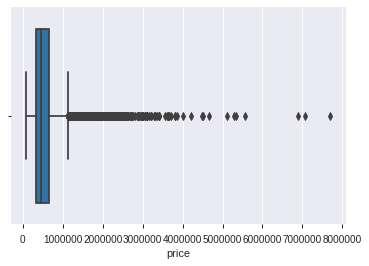

In [38]:
sns.boxplot(x=data['price'])

Thhe dataset contains houses that are very pricey, we may not say these are outliers hence we will not drop them

### Checking for duplicates

In [60]:
# Check for sum of duplicated rows
data.duplicated().sum()

3

In [61]:
#Dataset has 3 duplicate rows. We need to drop these.
data.drop_duplicates(keep=False,inplace=True) 
data.duplicated().sum()

0

In [62]:
# Check more infomation on our data e.g measures of central tendency
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160600e+04,2.160600e+04,21606.000000,21606.000000,21606.000000,2.160600e+04,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.00000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000
mean,4.580121e+09,5.401711e+05,3.369481,2.114737,2079.883967,1.511003e+04,1.494191,0.007544,0.234102,3.409377,7.656716,1788.339720,291.544247,1971.003194,84.24632,98077.950384,47.560039,-122.213918,1986.515274,12769.981949
std,2.876557e+09,3.674208e+05,0.908074,0.770258,918.575642,4.142685e+04,0.540000,0.086531,0.765971,0.650710,1.175560,828.189996,442.624251,29.372092,401.32802,53.506686,0.138581,0.140838,685.461575,27308.342446
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.00000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1422.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.00000,98033.000000,47.470825,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.00000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069350e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.00000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.00000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Most houses are 3 bedroomed, have 2 bathrooms,and price is about 450000, conditions are 3 and mostly built in 1975

###**Univariate Analysis**

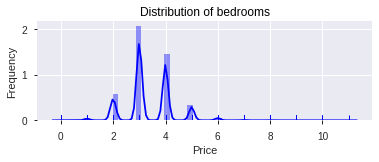

<Figure size 1080x1152 with 0 Axes>

In [70]:
# Plot using histograms
plt.subplot(212)
sns.distplot(data["bedrooms"],color="blue",rug=True)
plt.title("Distribution of bedrooms",color='black')
plt. ylabel('Frequency')
plt. xlabel('Price')
plt.figure(figsize=(15,16))
plt.tight_layout()
plt.show()

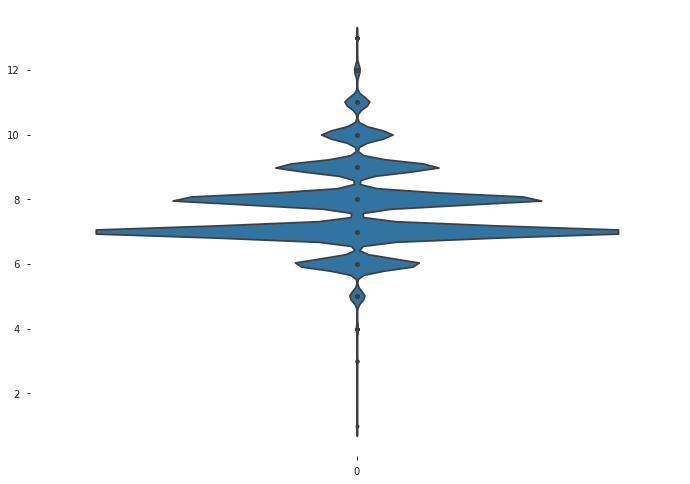

In [72]:
# plot using subplots
sns.set_style('ticks')
fig, ax = plt.subplots()

#  Set the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(data=data['grade'], inner="points", ax=ax)    
sns.despine()


Most houses are in grade 7 followed by grade 8

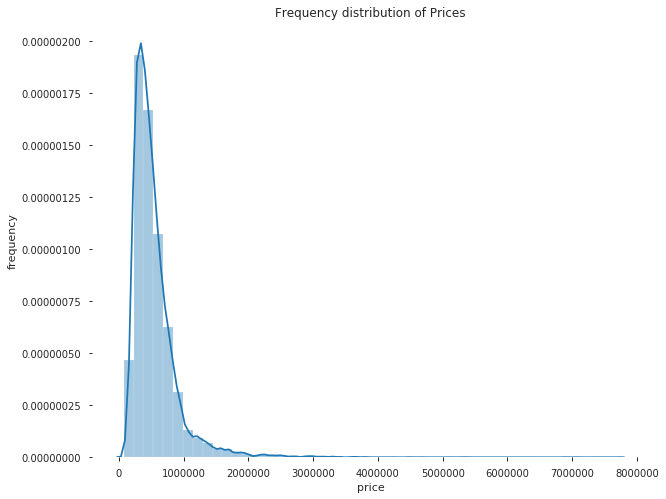

In [112]:
#  A graphical view of the home score variables
plt.figure(figsize = (10,8))
plt.tight_layout()

#We plot using a distribution plot
sns.distplot(data['price']) 
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Frequency distribution of Prices')
plt.show()

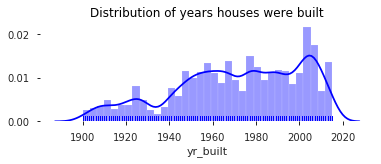

In [75]:
plt.subplot(212)
sns.distplot(data["yr_built"],color="blue",rug=True)
plt.title("Distribution of years houses were built",color='black')
plt.show()

Most houses were built from 1940, highest year being 2015.

###**Bivariate Analysis**

In [97]:
group_data = data.groupby(['yr_built','bedrooms'])['price'].max()
group_data

yr_built  bedrooms
1900      1            415000.0
          2           1700000.0
          3           1330000.0
          4           1400000.0
          5            870000.0
                        ...    
2015      1            385195.0
          2            659000.0
          3           1550000.0
          4           2000000.0
          5           1290000.0
Name: price, Length: 689, dtype: float64

From above,It shows the years and the maximum prices that were paid for each house with a specific number of bedrooms.

In [76]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

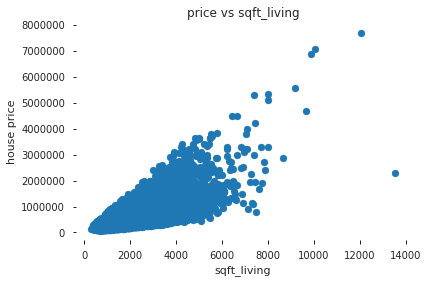

In [88]:
# Plot scatter plot
plt.scatter(data["sqft_living"],data["price"])
plt.ylabel("house price")
plt.xlabel("sqft_living")
plt.title("price vs sqft_living")
plt.show()

The scatter plot shows a positive linear correlation as the increase in the sqft_ living increases the house prices

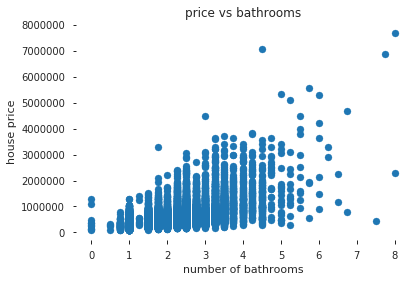

In [87]:
# Plot scatter plot
plt.scatter(data["bathrooms"],data["price"])
plt.ylabel("house price")
plt.xlabel("number of bathrooms")
plt.title("price vs bathrooms")
plt.show()

The plots throughout the scatterplot,this shows that number of bathrooms doesn't affect the house price. There are houses with more bathrooms but price is relatively lower.

##**Multivariate Analysis**

In [100]:
print(data[['floors','bedrooms','sqft_living']].sort_values('floors',ascending=False).head(10))

print('***********************************************')


print('Highest floor is',data['floors'].max())

       floors  bedrooms  sqft_living
15424     3.5         2         1730
14885     3.5         3         1730
11594     3.5         3         1760
875       3.5         0         3064
18477     3.5         8         7710
20308     3.5         2         1310
20772     3.5         3         1400
10077     3.5         3         1440
20546     3.0         3         1300
20554     3.0         3         1408
***********************************************
Highest floor is 3.5


In [98]:
data.groupby(['floors','bedrooms','sqft_living']).max()

id      price  ...  sqft_living15  sqft_lot15
floors bedrooms sqft_living                         ...                           
1.0    0        290          3980300371   142000.0  ...           1620       22850
                384          1222029077   265000.0  ...           1920      224341
                390          6896300380   228000.0  ...           2170        6000
                844          9543000205   139950.0  ...           1380        9600
       1        370          2856101479   276000.0  ...           1340        5000
...                                 ...        ...  ...            ...         ...
3.5    3        1400         1972200428   563500.0  ...           1350        1312
                1440         1972202010   435000.0  ...           1440        1350
                1730         8673400177   525000.0  ...           1370        1185
                1760         3180100023   544000.0  ...           1700        1721
       8        7710         1346300150  3300000.0  ...           4210        8325

[4164 rows x 17 columns]

In [101]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016800,0.002599,0.005009,-0.012238,-0.132103,0.018407,-0.002716,0.011968,-0.023508,0.008037,-0.010905,-0.004995,0.021028,-0.016477,-0.008017,-0.001799,0.020725,-0.002870,-0.138770
price,-0.016800,1.000000,0.315451,0.525155,0.702060,0.089663,0.256818,0.266334,0.397591,0.036376,0.667507,0.605596,0.323856,0.053990,0.126568,-0.053162,0.306920,0.021574,0.585416,0.082463
bedrooms,0.002599,0.315451,1.000000,0.529265,0.591475,0.032799,0.181124,-0.006612,0.081728,0.025375,0.366576,0.490638,0.309456,0.159368,0.019318,-0.157200,-0.010586,0.133883,0.402617,0.030379
bathrooms,0.005009,0.525155,0.529265,1.000000,0.754707,0.087756,0.500678,0.063749,0.188039,-0.124862,0.664993,0.685356,0.283877,0.505966,0.051015,-0.203787,0.024627,0.223038,0.568690,0.087201
sqft_living,-0.012238,0.702060,0.591475,0.754707,1.000000,0.172831,0.353946,0.103821,0.284665,-0.058735,0.762731,0.876605,0.435087,0.318137,0.055261,-0.199431,0.052535,0.240206,0.756417,0.183279
sqft_lot,-0.132103,0.089663,0.032799,0.087756,0.172831,1.000000,-0.005151,0.021597,0.074792,-0.008953,0.113663,0.183536,0.015263,0.053123,0.007709,-0.129644,-0.085670,0.229578,0.144626,0.718555
floors,0.018407,0.256818,0.181124,0.500678,0.353946,-0.005151,1.000000,0.023721,0.029193,-0.263727,0.458108,0.523846,-0.245621,0.489358,0.005964,-0.058911,0.049613,0.125235,0.279808,-0.011244
waterfront,-0.002716,0.266334,-0.006612,0.063749,0.103821,0.021597,0.023721,1.000000,0.402128,0.016664,0.082793,0.072083,0.080585,-0.026161,0.093015,0.030271,-0.014266,-0.041901,0.086473,0.030699
view,0.011968,0.397591,0.081728,0.188039,0.284665,0.074792,0.029193,0.402128,1.000000,0.045723,0.251429,0.167659,0.277059,-0.053031,0.102495,0.084856,0.005955,-0.078733,0.280362,0.072576
condition,-0.023508,0.036376,0.025375,-0.124862,-0.058735,-0.008953,-0.263727,0.016664,0.045723,1.000000,-0.144593,-0.158133,0.173989,-0.361241,-0.061091,0.002846,-0.015108,-0.106447,-0.092790,-0.003410


In [102]:
final_data = data.drop(["id","zipcode","lat","long","sqft_living","sqft_lot","sqft_above"],axis=1)
final_data.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,0,1955,0,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,400,1951,1991,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,0,1933,0,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,910,1965,0,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,0,1987,0,1800,7503


##**Detecting Multicollienality**

In [106]:
# Find the correlation of the variables
correlation=final_data.corr()
correlation

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.315451,0.525155,0.256818,0.266334,0.397591,0.036376,0.667507,0.323856,0.053990,0.126568,0.585416,0.082463
bedrooms,0.315451,1.000000,0.529265,0.181124,-0.006612,0.081728,0.025375,0.366576,0.309456,0.159368,0.019318,0.402617,0.030379
bathrooms,0.525155,0.529265,1.000000,0.500678,0.063749,0.188039,-0.124862,0.664993,0.283877,0.505966,0.051015,0.568690,0.087201
floors,0.256818,0.181124,0.500678,1.000000,0.023721,0.029193,-0.263727,0.458108,-0.245621,0.489358,0.005964,0.279808,-0.011244
waterfront,0.266334,-0.006612,0.063749,0.023721,1.000000,0.402128,0.016664,0.082793,0.080585,-0.026161,0.093015,0.086473,0.030699
view,0.397591,0.081728,0.188039,0.029193,0.402128,1.000000,0.045723,0.251429,0.277059,-0.053031,0.102495,0.280362,0.072576
condition,0.036376,0.025375,-0.124862,-0.263727,0.016664,0.045723,1.000000,-0.144593,0.173989,-0.361241,-0.061091,-0.092790,-0.003410
grade,0.667507,0.366576,0.664993,0.458108,0.082793,0.251429,-0.144593,1.000000,0.168514,0.446958,0.014325,0.713210,0.119277
sqft_basement,0.323856,0.309456,0.283877,-0.245621,0.080585,0.277059,0.173989,0.168514,1.000000,-0.132978,0.071323,0.200414,0.017253
yr_built,0.053990,0.159368,0.505966,0.489358,-0.026161,-0.053031,-0.361241,0.446958,-0.132978,1.000000,-0.224595,0.326342,0.071029


In [107]:
# use this correlations above to compute VIF(Variance Inflation Factor)
# create a new data frame with the inverse of the matrix above
#
#Compute the variation inflation factor
vif_data = pd.DataFrame(np.linalg.inv(correlation.values), index  = correlation.index, columns = correlation.columns)
vif_data

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,2.678227,0.095827,-0.515595,-0.193265,-0.386013,-0.233783,-0.086024,-1.326061,-0.260585,0.836509,-0.034922,-0.449454,0.033399
bedrooms,0.095827,1.521932,-0.744728,-0.017526,0.029484,0.123513,-0.059432,0.011167,-0.237297,0.194887,0.036750,-0.315627,0.046986
bathrooms,-0.515595,-0.744728,3.141242,-0.756117,0.055060,0.011133,-0.111714,-0.424780,-0.664123,-0.991299,-0.258704,-0.224470,-0.044480
floors,-0.193265,-0.017526,-0.756117,1.904902,0.013121,-0.040063,0.141576,-0.363449,0.706072,-0.331479,-0.056231,0.244675,0.117142
waterfront,-0.386013,0.029484,0.055060,0.013121,1.256503,-0.458313,-0.002492,0.206568,0.064634,-0.134913,-0.062188,0.084149,-0.010137
view,-0.233783,0.123513,0.011133,-0.040063,-0.458313,1.423849,0.000023,-0.055835,-0.262364,0.124796,-0.029257,-0.209695,-0.034198
condition,-0.086024,-0.059432,-0.111714,0.141576,-0.002492,0.000023,1.223726,0.036707,-0.072978,0.443233,0.196467,0.060523,-0.022744
grade,-1.326061,0.011167,-0.424780,-0.363449,0.206568,-0.055835,0.036707,3.433395,0.000659,-0.702652,-0.030013,-1.100077,-0.018068
sqft_basement,-0.260585,-0.237297,-0.664123,0.706072,0.064634,-0.262364,-0.072978,0.000659,1.602851,0.183155,0.010348,0.098337,0.052520
yr_built,0.836509,0.194887,-0.991299,-0.331479,-0.134913,0.124796,0.443233,-0.702652,0.183155,2.248468,0.471675,-0.152556,-0.050389


All the variables have VIF of less than 5 hence can be used for prediction.

##**Normalization of the data**

###PCA Analysis
This is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

We conduct pca to normalize our data since variables have different data types

In [113]:
final_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
# obtaining the attributes and the label
X = final_data[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']].values
y = np.log(final_data['price'])


In [0]:
# splitting using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# We will use standard scalar normalization to normalize our feature set. 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [135]:
print(pca.components_)

[[ 3.08671106e-01  4.67849002e-01  3.29019172e-01  7.39857698e-02
   1.63634833e-01 -1.40276855e-01  4.61278739e-01  1.16861155e-01
   3.39945770e-01 -1.38086095e-03  4.19988255e-01  8.52538727e-02]
 [ 1.75885325e-01  3.61426346e-02 -3.37993803e-01  2.88826701e-01
   4.23446412e-01  3.56673860e-01  2.69166758e-02  5.10811913e-01
  -3.81339788e-01  1.93631218e-01  1.23818774e-01  6.06365571e-02]
 [-3.83590470e-01 -1.21704302e-01  1.81026459e-01  5.94866432e-01
   4.22464703e-01 -3.19847842e-01 -2.35508486e-03 -2.87563640e-01
   2.40348894e-02  2.80651073e-01 -5.20423296e-02  7.66889710e-02]
 [-1.88911187e-01 -1.18235710e-01 -1.53632364e-01  1.15722884e-01
   1.27491170e-01  1.95221698e-01  2.77162147e-02 -7.66242130e-02
   1.52323362e-01 -6.60586394e-01  1.26885575e-01  6.13723458e-01]
 [-9.50158059e-03 -1.51185353e-02 -8.20819249e-02 -2.97406792e-01
  -1.82034686e-01 -1.51760477e-01  3.31120011e-02 -4.76088178e-02
  -1.35968583e-01  5.52053317e-01  1.04425793e-01  7.14707610e-01]
 [-4.

In [0]:
#Perform the pca 
pca = PCA(n_components=12)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [137]:
#Get the explained variance ratio
pca.explained_variance_ratio_

array([0.28659296, 0.15585807, 0.10706505, 0.08771496, 0.08264844,
       0.06557002, 0.05485101, 0.0456714 , 0.042697  , 0.03154682,
       0.02048646, 0.0192978 ])

##**Multiple Linear Regression**

In [138]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
#Check the intercept
regressor.intercept_

13.048079384489633

In [140]:
#Check the coefficient
regressor.coef_

array([ 0.18266308,  0.12323455,  0.00278085, -0.02150447,  0.01767436,
       -0.08917744, -0.12320998, -0.04771814,  0.04550047,  0.19117857,
       -0.11926631,  0.03750437])

In [141]:
# Predict the model
y_pred = regressor.predict(X_test)
y_pred

array([12.93958509, 12.88760611, 12.78439767, ..., 12.33585618,
       13.25662375, 12.69577144])

In [142]:
#check how accurate our model will be 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.24638264042710264
Mean Squared Error: 0.09515206826144135
Root Mean Squared Error: 0.30846728880294805


In [143]:
#Check the coefficient of multiple determination for multiple regression.
r2_score(y_test,y_pred)

0.6552919016043569

The r2 of 65% shows that  the fitted values all almost equal the observed values and, therefore, most of  the data points would fall on the fitted regression line.

However,R-squared cannot determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots.

##**Residual plots Heteroskedasticity Testing**

In [146]:
#Calculate residuals
residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
print(pd.DataFrame(residuals).describe())
print('********************************')
print(residuals.mean())

             price
count  4322.000000
mean      0.007690
std       0.308407
min      -1.225217
25%      -0.202958
50%      -0.002617
75%       0.220997
max       1.481334
********************************
0.007690144882289613


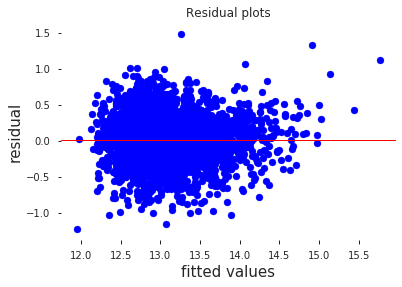

In [152]:
plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual',fontsize = 15)
plt.xlabel('fitted values',fontsize = 15)
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residual plots')
plt.show()



*   There are no patterns from the plot above
Since the residuals aren't plotted very close to mean of 0.007




###**Heteroskedasticity**

In [154]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# compute the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("the variances are unequal, and the model should be reassessed")
else:
    print("The variances are homogeneous!")

The variances are homogeneous!


###**Quantile Regression**

In [0]:
#perform a train and a test for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [158]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', final_data)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4020
Model:                       QuantReg   Bandwidth:                     0.05420
Method:                 Least Squares   Sparsity:                       0.7940
Date:                Tue, 28 Jan 2020   No. Observations:                21606
Time:                        09:45:36   Df Residuals:                    21593
                                        Df Model:                           12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6123      0.254     89.032      0.000      22.114      23.110
X[0]          -0.0126      0.004     -3.434      0.001      -0.020      -0.005
X[1]           0.1025      0.006     16.755      0.000       0.090       0.114
X[2]           0.1439      0.007     20.924      0.0

In [159]:
final_data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [0]:
fin_data = final_data.copy()

In [162]:

cols = fin_data.columns[fin_data.dtypes.eq('object')]
cols

Index([], dtype='object')

###**Ridge Regression**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [0]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

In [175]:
#determine the strength of the model using best params and best score
search.fit(X_train,y_train)
search.best_params_
{'alpha': 0.001}
abs(search.best_score_)

0.09646640152535352

The params has choosen its alpha as 0.001 for this model

Best score == MSE

In [176]:
# Create another model
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.09727239000472078


In [178]:
# Predict using the model
y_pred=ridge.predict(X)
y_pred

array([12.64162375, 13.067174  , 12.75394202, ..., 12.40062611,
       12.89559762, 12.40634709])

In [180]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,fin_data.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.13252745981707695,
 'bedrooms': 0.10541102244185722,
 'condition': 0.22957204114050325,
 'floors': 0.36836119665219785,
 'grade': 0.0001327064064174718,
 'price': -0.006964169289025522,
 'sqft_basement': -0.005659924705843217,
 'sqft_living15': -9.392410124152948e-08,
 'view': 0.04081359418592197,
 'waterfront': 0.03680372292331314,
 'yr_built': 1.622391321488305e-05,
 'yr_renovated': 0.00015263357566787616}



*   The number of floors has a large impact on the response variable followed by the year built followed by the number of bedrooms


* The difference between the model of Multiple linear regression  while Ridge regression is very small.

*   We need to perfom another model to see if the accuracy level is almost the same as the above models


* A model with the highest R-squared score will give us the best target parameters for model prediction in Lasso regression.








###**Lasso regression**

Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients

In [0]:
# Step 1
#Scale our data
#We still use the prediction dataset.
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [182]:
#Step 2
# Creating lasso object
lasso = linear_model.Lasso() 

#Step 3
# Fitting the models
lasso.fit(X, y) 

#Step 4
# Print scores, MSE, and coefficients

print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.0
lasso MSE: 0.2776031344216489
lasso coef: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [183]:
#Splitting the data into training and test sets and choose your parameters with GridSearch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.4796908232769117
linear score: 0.6518460522705258
lasso MSE: 0.14415163705307338
linear MSE: 0.09645603759628414
lasso best estimator coef: [ 0.          0.0009536   0.          0.          0.0021813   0.
  0.2218897   0.01524368 -0.          0.          0.06413597  0.        ]
linear coef: [-0.00728136  0.08083146  0.07354091  0.02797867  0.02929477  0.02679547
  0.26936119  0.06065812 -0.16493131  0.00467494  0.10336572 -0.00140629]


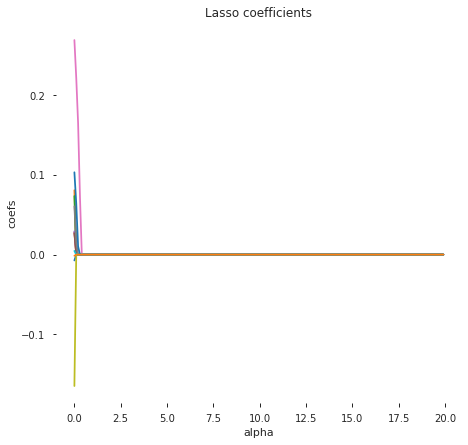

In [184]:
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


 Lasso explains that the model complexity increased with very little increase in the values of alpha then decreased. However, the line at 0.0 is alarming hence we need to go check the coefficients if there is high sparsity.

###**Elastic Net Regression**

The elastic net is a regularized regression method that linearly combines the L₁ and L₂ penalties of the lasso and ridge methods.

In [0]:
#In the grid ,we need to set several values of this argument.

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [187]:
#We will now fit our model and display the best parameters and the best results we can get with that setup.

search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


0.09833575102756045

the best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. With these settings we got an MSE of 0.098.

 Which means that elastic net is doing worse than linear regression. For clarity, we will set our hyperparameters to the recommended values and run on the data.

In [189]:
#We create the second model to see accuracy change
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

0.0976955581486225


Now our values are about the same. Below are the coefficients

In [0]:
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

###**Future questions**



1.   Which models provide better accuracy for price prediction?
2.   Did the nature of the data bias the prediction output since most houses are pricey?



###**Possible Solutions**



1.   Get data which has widespread variety of prices to avoid biasness of prediction results.
2.   Drop anomalies such as outliers to depict better accuracy results of the model.

